<h1><center>This Notebook Contains CNN development using Tensorflow</center></h1>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [3]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

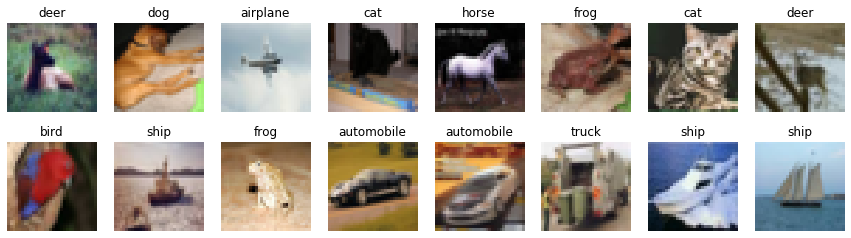

In [4]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [5]:
# normalize inputs
x_train2 = x_train/255 - 0.5 
x_test2 = x_test/255 - 0.5 

In [6]:
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=10) 
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=10) 

In [7]:
# import necessary building blocks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU

In [8]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()

    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [9]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10

In [10]:
from tensorflow.python.framework import ops
ops.reset_default_graph() # clear default graph
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [11]:
# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=tf.keras.optimizers.Adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [12]:
# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

In [13]:
# callback for printing of actual learning rate used by optimizer
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate: ", tf.keras.backend.get_value(model.optimizer.lr), "/n")

In [14]:
class ModelSaveCallback(tf.keras.callbacks.Callback):
    def __init__(self, file_name):
        super(ModelSaveCallback, self).__init__()
        self.file_name = file_name

    def on_epoch_end(self, epoch, logs=None):
        if epoch%5==0:
            model_filename = self.file_name.format(epoch)
            tf.keras.models.save_model(self.model, model_filename)
            print("Model saved in {} /n".format(model_filename))

In [15]:
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if(logs.get('accuracy')>0.9):
#            print("\nReached 60% accuracy so cancelling training!")
#            self.model.stop_training = True

In [16]:
class LossAndErrorPrintingCallback(tf.keras.callbacks.Callback):
    #def on_train_batch_end(self, batch, logs=None):
    # print('For batch {}, loss is {:7.2f}.'.format(batch, logs['loss']))
    #def on_test_batch_end(self, batch, logs=None):
    # print('For batch {}, loss is {:7.2f}.'.format(batch, logs['loss']))
    def on_epoch_end(self, epoch, logs=None):
        print('The average loss for epoch {} is {:7.2f} and accuracy is {:7.2f}./n'.format(epoch, 
                                                                                           logs['loss'], logs['accuracy']))

In [17]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'cifar.{0:03d}.hdf5'
last_finished_epoch = None

In [18]:
#### uncomment below to continue training from model checkpoint
#### fill `last_finished_epoch` with your latest finished epoch
# from tf.keras.models import load_model
# ops.reset_default_graph() # clear default graph
# last_finished_epoch = 7
# model = load_model(model_filename.format(last_finished_epoch))

In [19]:
from tqdm import tqdm
for i in tqdm(range(10000)):
    pass

100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 1246005.58it/s]


In [20]:
# fit model
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory(), 
               LossAndErrorPrintingCallback(),
               ModelSaveCallback(model_filename)],
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=2,
    initial_epoch=last_finished_epoch or 0
)

Train on 50000 samples, validate on 10000 samples
Learning rate:  0.005 /n
Epoch 1/10
The average loss for epoch 0 is    1.37 and accuracy is    0.51./n
Model saved in cifar.000.hdf5 /n
50000/50000 - 71s - loss: 1.3660 - accuracy: 0.5116 - val_loss: 1.0152 - val_accuracy: 0.6417
Learning rate:  0.0045 /n
Epoch 2/10
The average loss for epoch 1 is    0.95 and accuracy is    0.67./n
50000/50000 - 69s - loss: 0.9517 - accuracy: 0.6667 - val_loss: 0.7941 - val_accuracy: 0.7230
Learning rate:  0.00405 /n
Epoch 3/10
The average loss for epoch 2 is    0.82 and accuracy is    0.71./n
50000/50000 - 69s - loss: 0.8156 - accuracy: 0.7131 - val_loss: 0.7395 - val_accuracy: 0.7427
Learning rate:  0.003645 /n
Epoch 4/10
The average loss for epoch 3 is    0.73 and accuracy is    0.74./n
50000/50000 - 69s - loss: 0.7302 - accuracy: 0.7431 - val_loss: 0.7026 - val_accuracy: 0.7581
Learning rate:  0.0032805 /n
Epoch 5/10
The average loss for epoch 4 is    0.68 and accuracy is    0.76./n
50000/50000 - 69

In [21]:
# save weights to file
model.save_weights("weights.h5")

In [22]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

In [23]:
# make test predictions
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

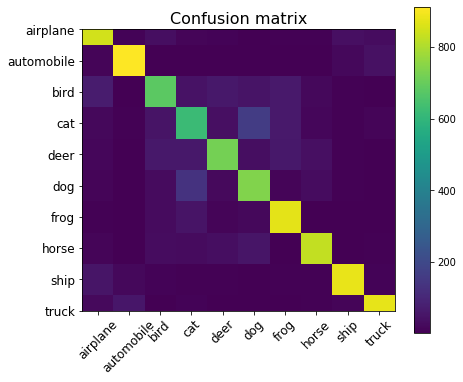

Test accuracy: 0.7987


In [24]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

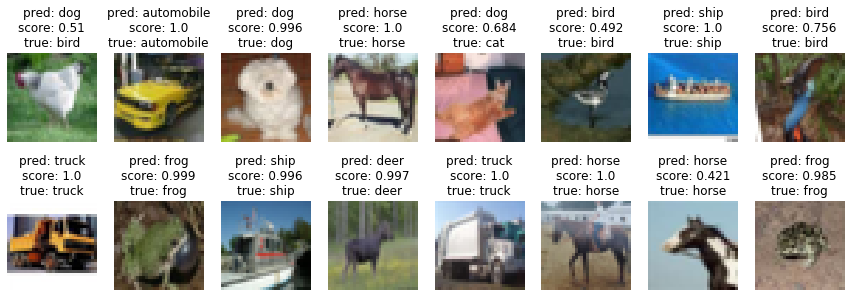

In [25]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

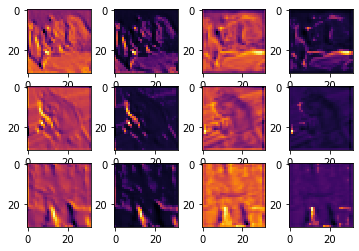

In [32]:
#Visualizing Convolutions
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 8
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(x_test2[FIRST_IMAGE].reshape(1, 32, 32, 3))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(x_test2[SECOND_IMAGE].reshape(1, 32, 32, 3))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(x_test2[THIRD_IMAGE].reshape(1, 32, 32, 3))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)